# Kaggle House Price Prediction EDA

In [1]:
import pandas as pd
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [2]:
df3=pd.concat([df1,df2])

In [3]:
intcol=df3.select_dtypes(include=['int64','float64'])
catcol=df3.select_dtypes(include=object)
intcol.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [4]:
intcol.drop(['SalePrice','Id'],axis=1,inplace=True)

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Univariate Analysis

In [5]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
intcol.shape

(2919, 36)

### Histogram 

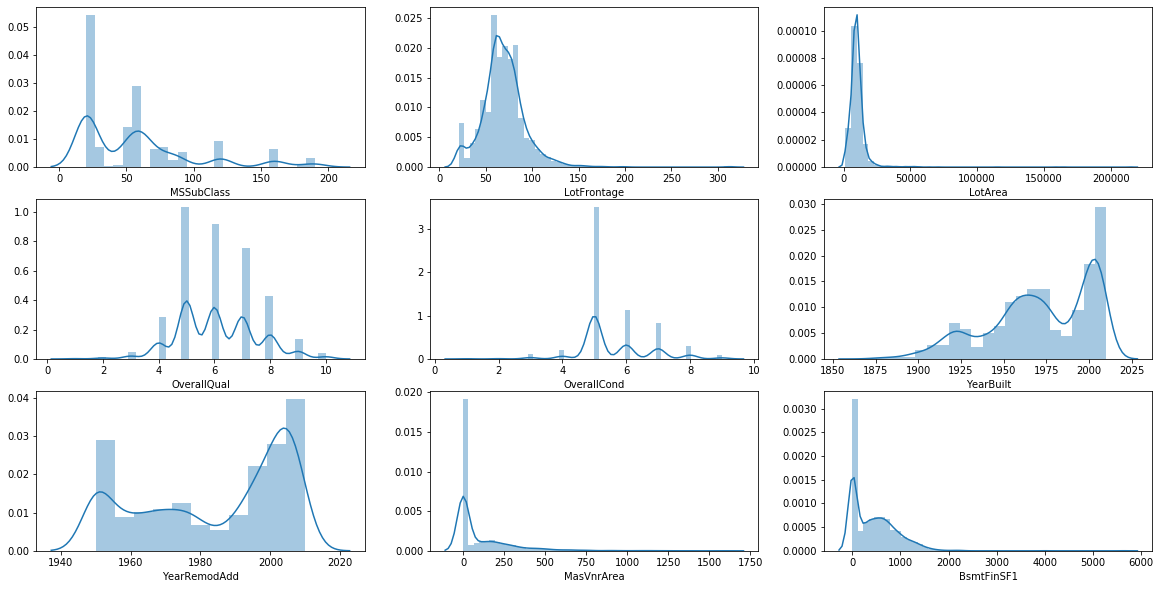

In [6]:
col=intcol.columns
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.distplot(intcol[col[0]],ax=ax[0][0])
sns.distplot(intcol[col[1]],ax=ax[0][1])
sns.distplot(intcol[col[2]],ax=ax[0][2])
sns.distplot(intcol[col[3]],ax=ax[1][0])
sns.distplot(intcol[col[4]],ax=ax[1][1])
sns.distplot(intcol[col[5]],ax=ax[1][2])
sns.distplot(intcol[col[6]],ax=ax[2][0])
sns.distplot(intcol[col[7]],ax=ax[2][1])
sns.distplot(intcol[col[8]],ax=ax[2][2])

1. LotFrontage,LotArea,MasVnrArea,BsmtFinSF1 is right skewed. Needs Log Transformation.
2. YearBuilt is left skewed. Needs Log Transformation.
3. 1-type story dwelling are maximum. ( 0 < MSSubClass < 50 )
4. Overall condition of most houses are 5(Average)
5. Most of the houses were built after 2000 due to cheap lands ( Which led to the great economic recession of 2009 )

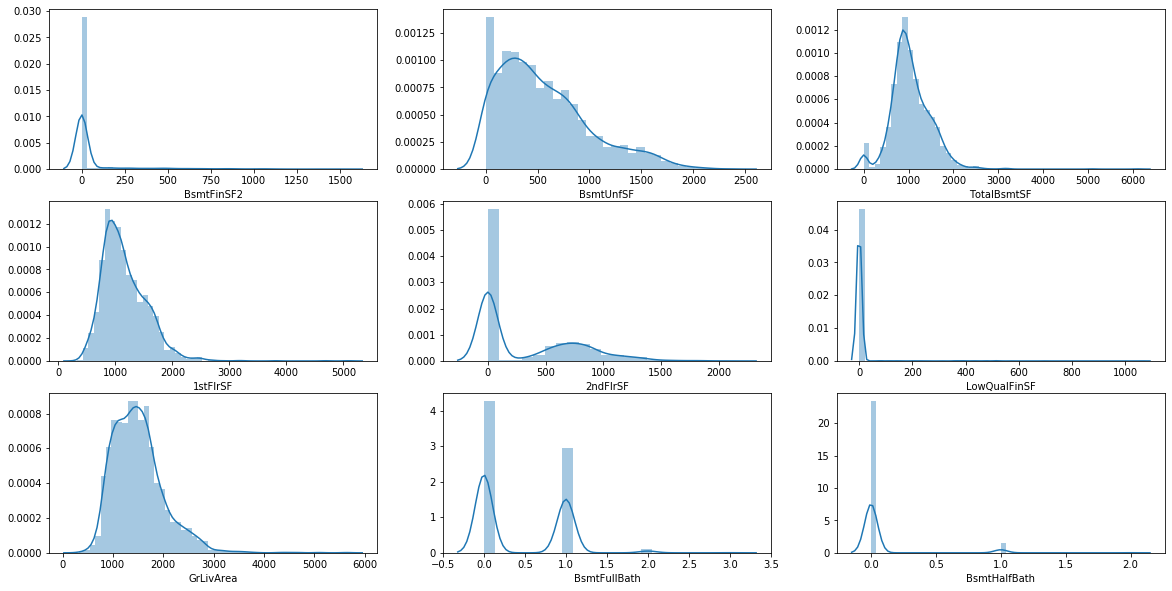

In [7]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.distplot(intcol[col[9]],ax=ax[0][0])
sns.distplot(intcol[col[10]],ax=ax[0][1])
sns.distplot(intcol[col[11]],ax=ax[0][2])
sns.distplot(intcol[col[12]],ax=ax[1][0])
sns.distplot(intcol[col[13]],ax=ax[1][1])
sns.distplot(intcol[col[14]],ax=ax[1][2])
sns.distplot(intcol[col[15]],ax=ax[2][0])
sns.distplot(intcol[col[16]],ax=ax[2][1])
sns.distplot(intcol[col[17]],ax=ax[2][2])

1. Most of these features are right skewed. Will need Log Transformation.
2. Most basements don't have half bathrooms. 

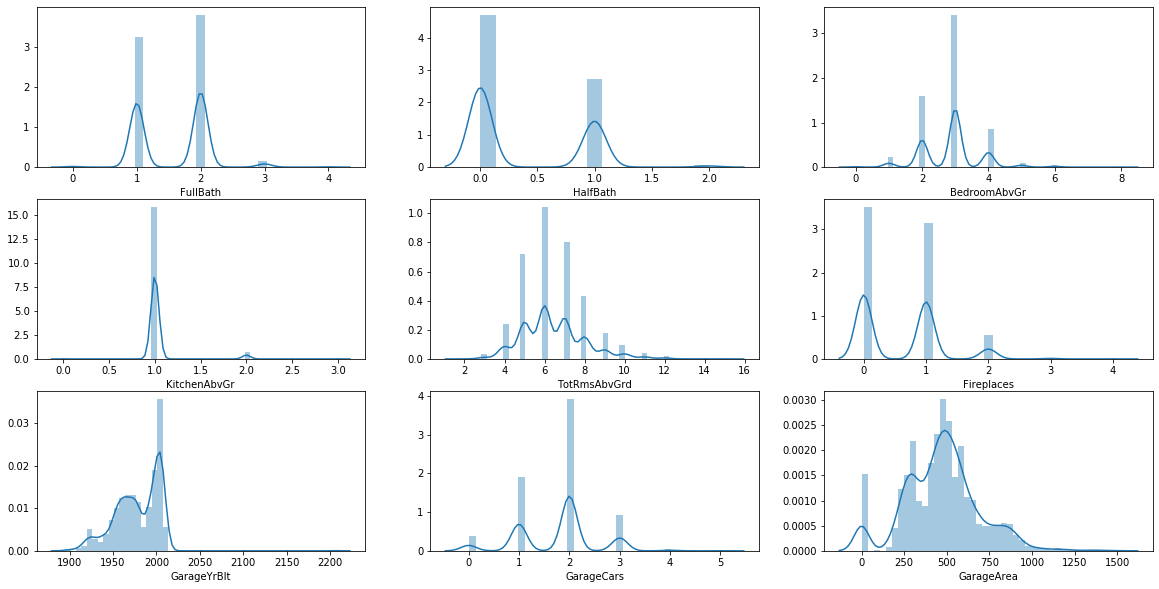

In [8]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.distplot(intcol[col[18]],ax=ax[0][0])
sns.distplot(intcol[col[19]],ax=ax[0][1])
sns.distplot(intcol[col[20]],ax=ax[0][2])
sns.distplot(intcol[col[21]],ax=ax[1][0])
sns.distplot(intcol[col[22]],ax=ax[1][1])
sns.distplot(intcol[col[23]],ax=ax[1][2])
sns.distplot(intcol[col[24]],ax=ax[2][0])
sns.distplot(intcol[col[25]],ax=ax[2][1])
sns.distplot(intcol[col[26]],ax=ax[2][2])

1. Most houses have 3 bedrooms, 1 kitchen and totally 6 rooms above ground.
2. Most garages have the capacity of 2 cars.

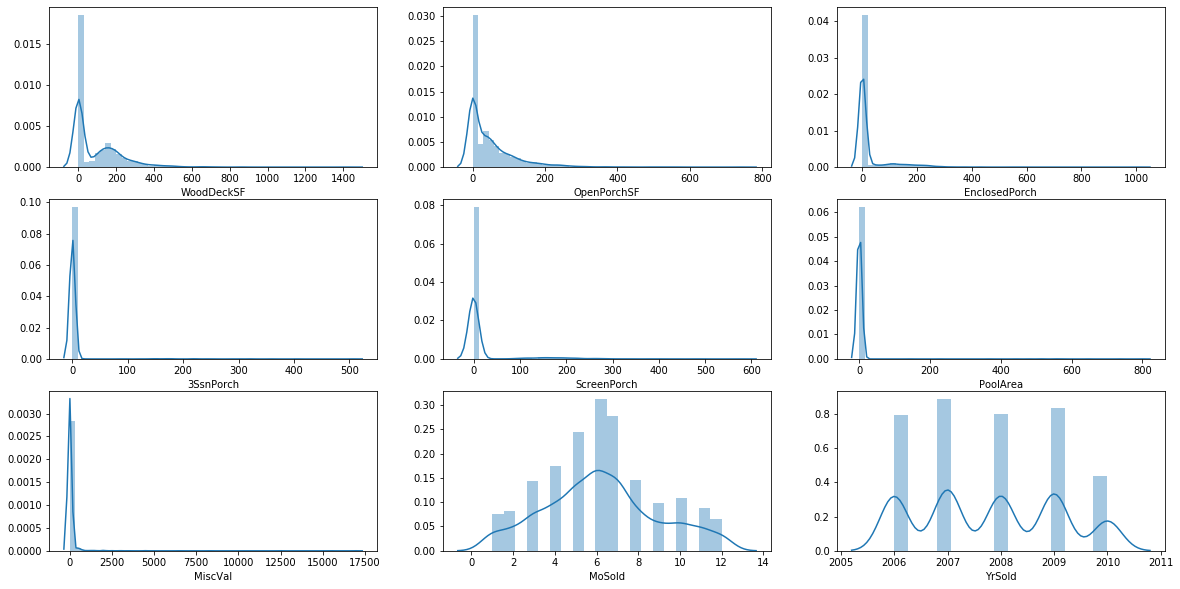

In [9]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.distplot(intcol[col[27]],ax=ax[0][0])
sns.distplot(intcol[col[28]],ax=ax[0][1])
sns.distplot(intcol[col[29]],ax=ax[0][2])
sns.distplot(intcol[col[30]],ax=ax[1][0])
sns.distplot(intcol[col[31]],ax=ax[1][1])
sns.distplot(intcol[col[32]],ax=ax[1][2])
sns.distplot(intcol[col[33]],ax=ax[2][0])
sns.distplot(intcol[col[34]],ax=ax[2][1])
sns.distplot(intcol[col[35]],ax=ax[2][2])

1. Most of these features are right skewed.
2. Most houses sold at mid of a year. ( Can expect the prices to be high)
3. Sales of house decrease after 2009.

### BoxPlot ( the outliers may change after transformations )

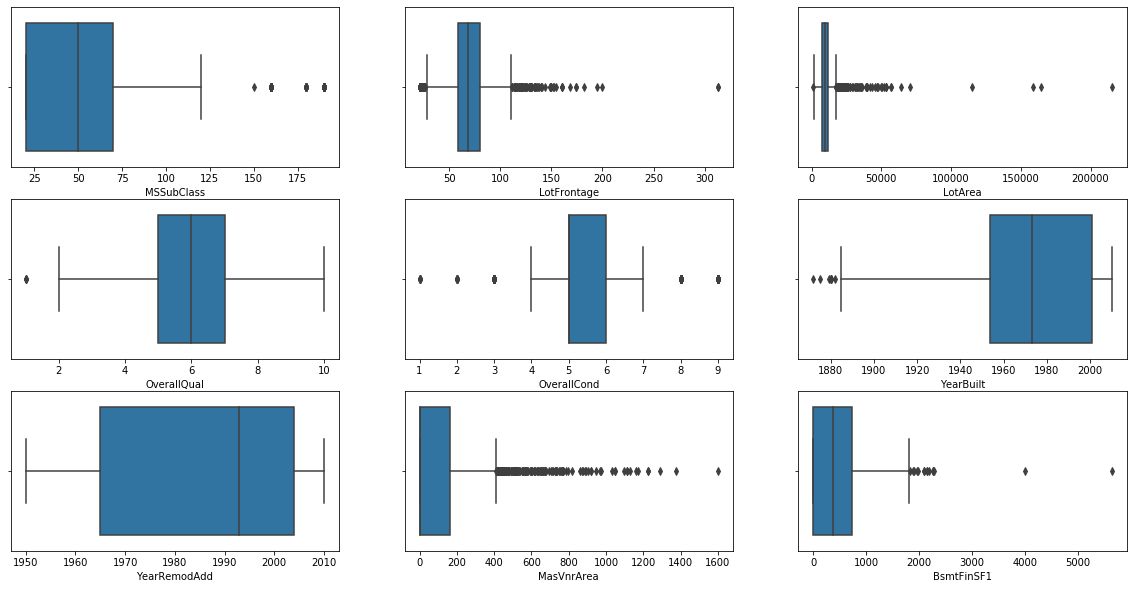

In [10]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.boxplot(intcol[col[0]],ax=ax[0][0])
sns.boxplot(intcol[col[1]],ax=ax[0][1])
sns.boxplot(intcol[col[2]],ax=ax[0][2])
sns.boxplot(intcol[col[3]],ax=ax[1][0])
sns.boxplot(intcol[col[4]],ax=ax[1][1])
sns.boxplot(intcol[col[5]],ax=ax[1][2])
sns.boxplot(intcol[col[6]],ax=ax[2][0])
sns.boxplot(intcol[col[7]],ax=ax[2][1])
sns.boxplot(intcol[col[8]],ax=ax[2][2])

1. Eventhough MSSubClass looks like it has outliers, actually those are not outliers but kind of categorical variables. 
2. Cap LotFrontage, LotArea,MasVnrArea at 175, 5000, 850 respectively.
3. Remove the rows of BsmtFinSf1 > 3000  

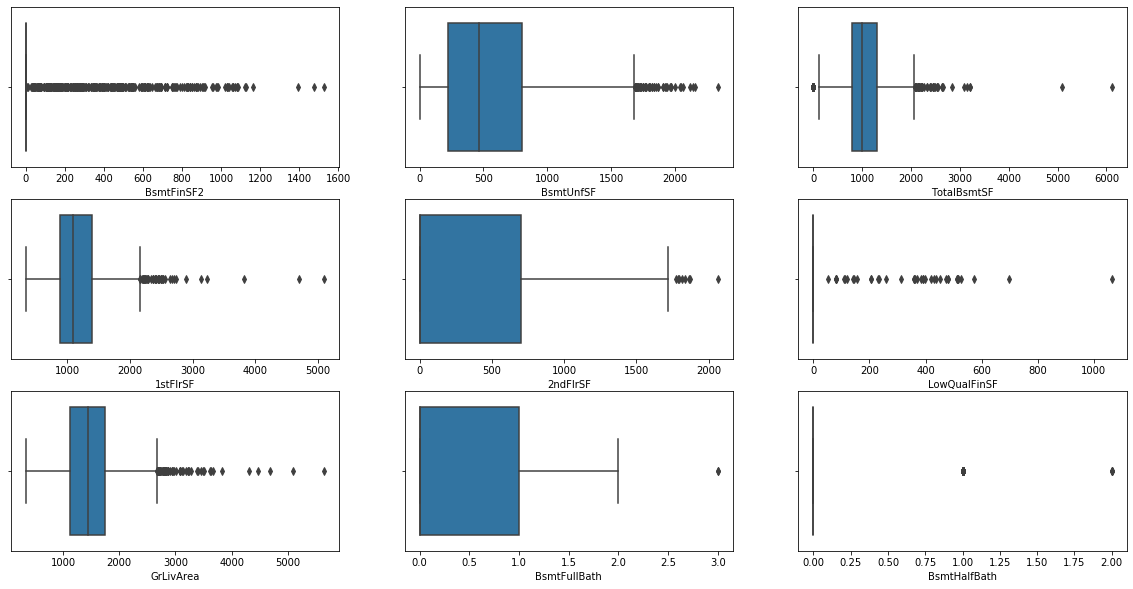

In [11]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.boxplot(intcol[col[9]],ax=ax[0][0])
sns.boxplot(intcol[col[10]],ax=ax[0][1])
sns.boxplot(intcol[col[11]],ax=ax[0][2])
sns.boxplot(intcol[col[12]],ax=ax[1][0])
sns.boxplot(intcol[col[13]],ax=ax[1][1])
sns.boxplot(intcol[col[14]],ax=ax[1][2])
sns.boxplot(intcol[col[15]],ax=ax[2][0])
sns.boxplot(intcol[col[16]],ax=ax[2][1])
sns.boxplot(intcol[col[17]],ax=ax[2][2])

1. Outliers of BsmtUnSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea must be capped at 2000,3000,3000,2000,4000
2. BsmtFinSF2 can be dropped 

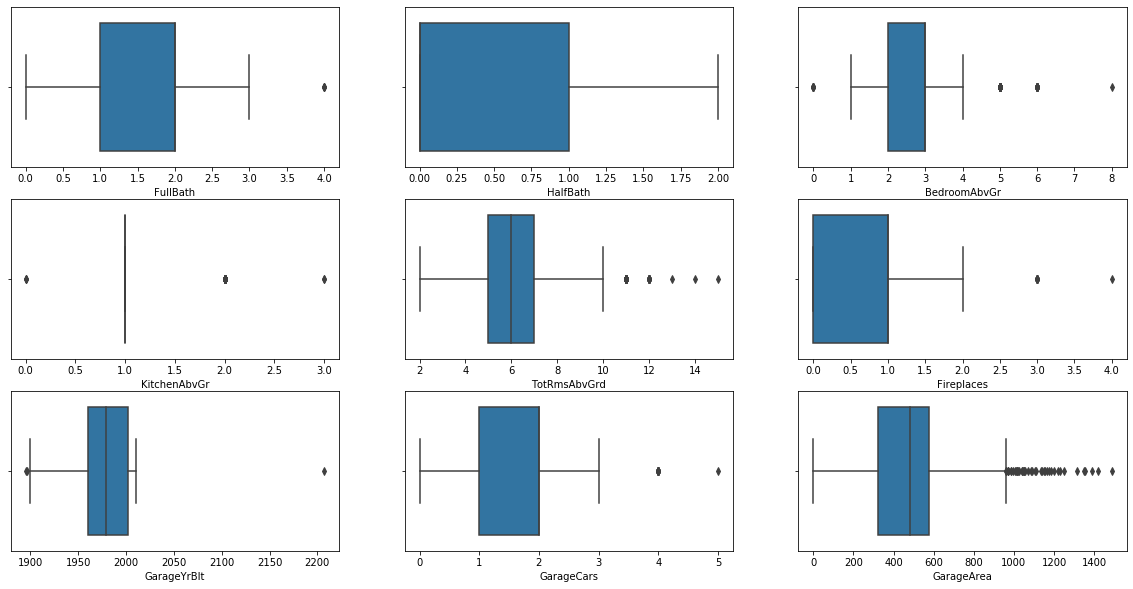

In [12]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.boxplot(intcol[col[18]],ax=ax[0][0])
sns.boxplot(intcol[col[19]],ax=ax[0][1])
sns.boxplot(intcol[col[20]],ax=ax[0][2])
sns.boxplot(intcol[col[21]],ax=ax[1][0])
sns.boxplot(intcol[col[22]],ax=ax[1][1])
sns.boxplot(intcol[col[23]],ax=ax[1][2])
sns.boxplot(intcol[col[24]],ax=ax[2][0])
sns.boxplot(intcol[col[25]],ax=ax[2][1])
sns.boxplot(intcol[col[26]],ax=ax[2][2])

1. Most of the above features are discrete ( not continuous ).
2. GarageArea has many ouliers and can be capped at 1200

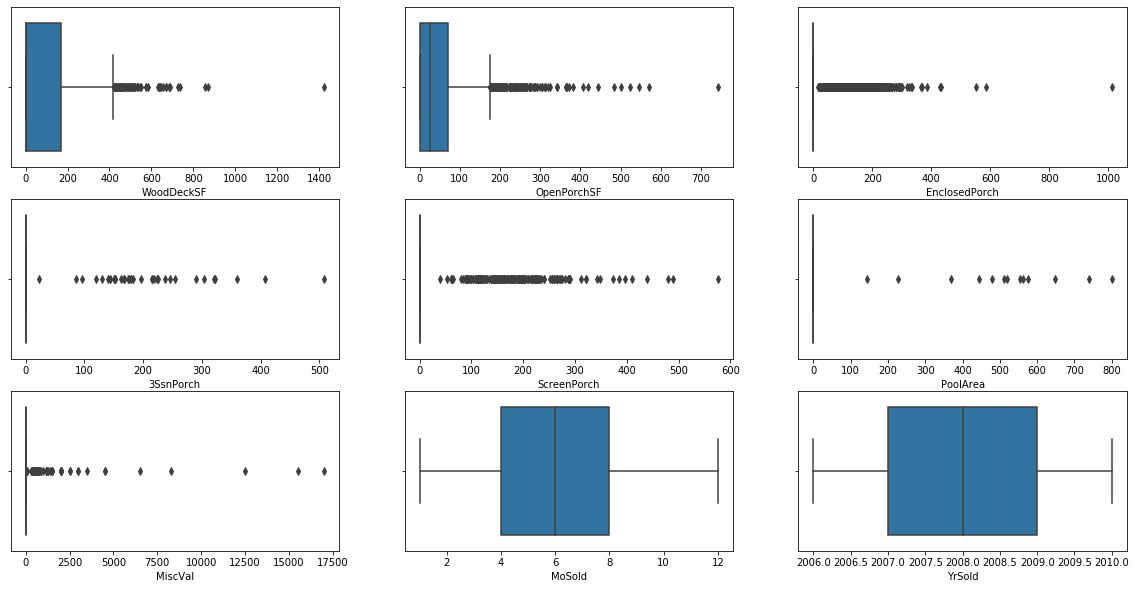

In [13]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.boxplot(intcol[col[27]],ax=ax[0][0])
sns.boxplot(intcol[col[28]],ax=ax[0][1])
sns.boxplot(intcol[col[29]],ax=ax[0][2])
sns.boxplot(intcol[col[30]],ax=ax[1][0])
sns.boxplot(intcol[col[31]],ax=ax[1][1])
sns.boxplot(intcol[col[32]],ax=ax[1][2])
sns.boxplot(intcol[col[33]],ax=ax[2][0])
sns.boxplot(intcol[col[34]],ax=ax[2][1])
sns.boxplot(intcol[col[35]],ax=ax[2][2])

1. WoodDeckSF, OpenPorchSF outliers can be capped at 800 and 400 respectively

## Bivarviate Analysis

### ScatterPlot

C:\Users\GOWRI\anaconda3\envs\mltutorial\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


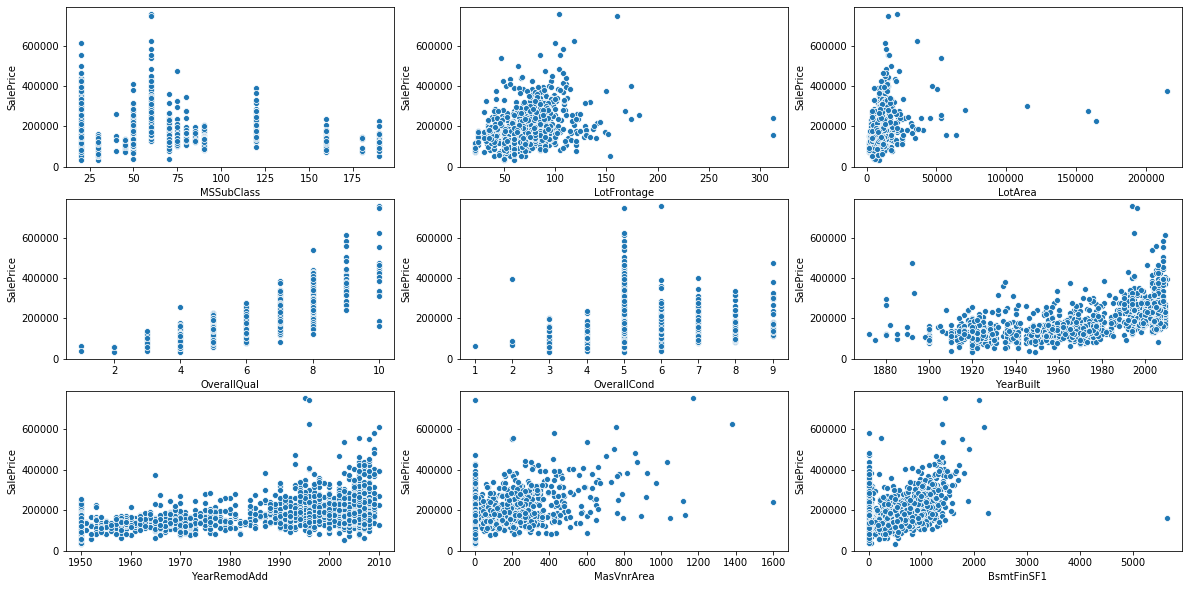

In [14]:
intcol1=df1.select_dtypes(include=['int64','float64'])
intcol1.drop('Id',axis=1,inplace=True)
col1=intcol1.columns
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.scatterplot(x=df1[col1[0]],y=df1.SalePrice,ax=ax[0][0])
sns.scatterplot(x=df1[col1[1]],y=df1.SalePrice,ax=ax[0][1])
sns.scatterplot(x=df1[col1[2]],y=df1.SalePrice,ax=ax[0][2])
sns.scatterplot(x=df1[col1[3]],y=df1.SalePrice,ax=ax[1][0])
sns.scatterplot(x=df1[col1[4]],y=df1.SalePrice,ax=ax[1][1])
sns.scatterplot(x=df1[col1[5]],y=df1.SalePrice,ax=ax[1][2])
sns.scatterplot(x=df1[col1[6]],y=df1.SalePrice,ax=ax[2][0])
sns.scatterplot(x=df1[col1[7]],y=df1.SalePrice,ax=ax[2][1])
sns.scatterplot(x=df1[col1[8]],y=df1.SalePrice,ax=ax[2][2])

1. MSSubClass 60 houses are sold at higher prices
2. Houses of Condition 9 should have the highest price but Condition 5 seems to have high prices.
3. Recently built houses goes for higher prices.

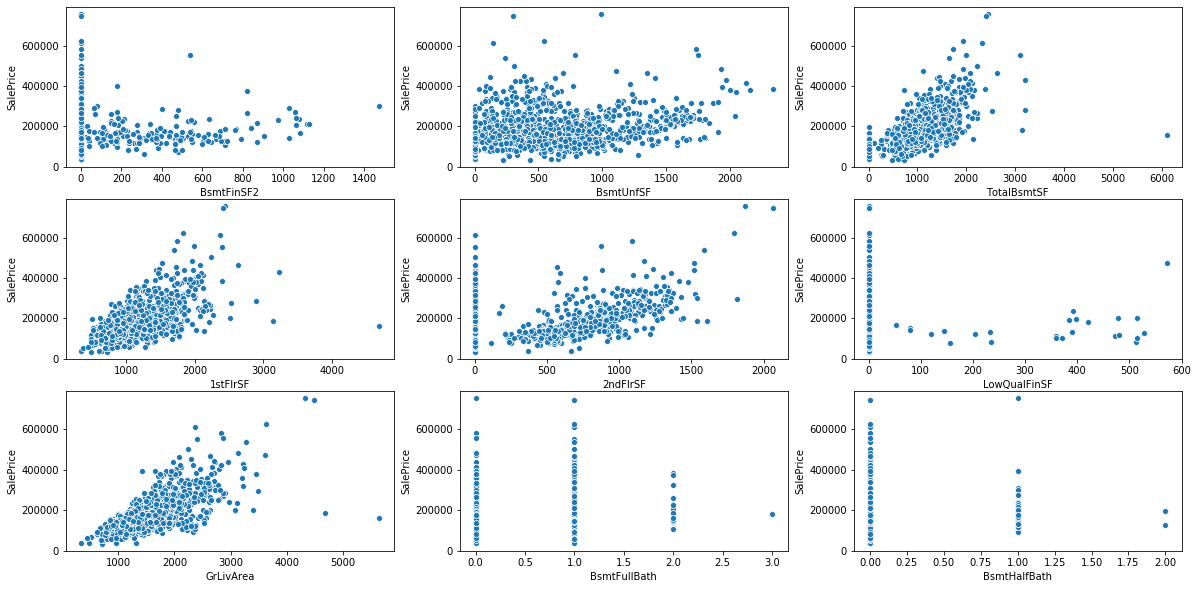

In [15]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.scatterplot(x=df1[col1[9]],y=df1.SalePrice,ax=ax[0][0])
sns.scatterplot(x=df1[col1[10]],y=df1.SalePrice,ax=ax[0][1])
sns.scatterplot(x=df1[col1[11]],y=df1.SalePrice,ax=ax[0][2])
sns.scatterplot(x=df1[col1[12]],y=df1.SalePrice,ax=ax[1][0])
sns.scatterplot(x=df1[col1[13]],y=df1.SalePrice,ax=ax[1][1])
sns.scatterplot(x=df1[col1[14]],y=df1.SalePrice,ax=ax[1][2])
sns.scatterplot(x=df1[col1[15]],y=df1.SalePrice,ax=ax[2][0])
sns.scatterplot(x=df1[col1[16]],y=df1.SalePrice,ax=ax[2][1])
sns.scatterplot(x=df1[col1[17]],y=df1.SalePrice,ax=ax[2][2])

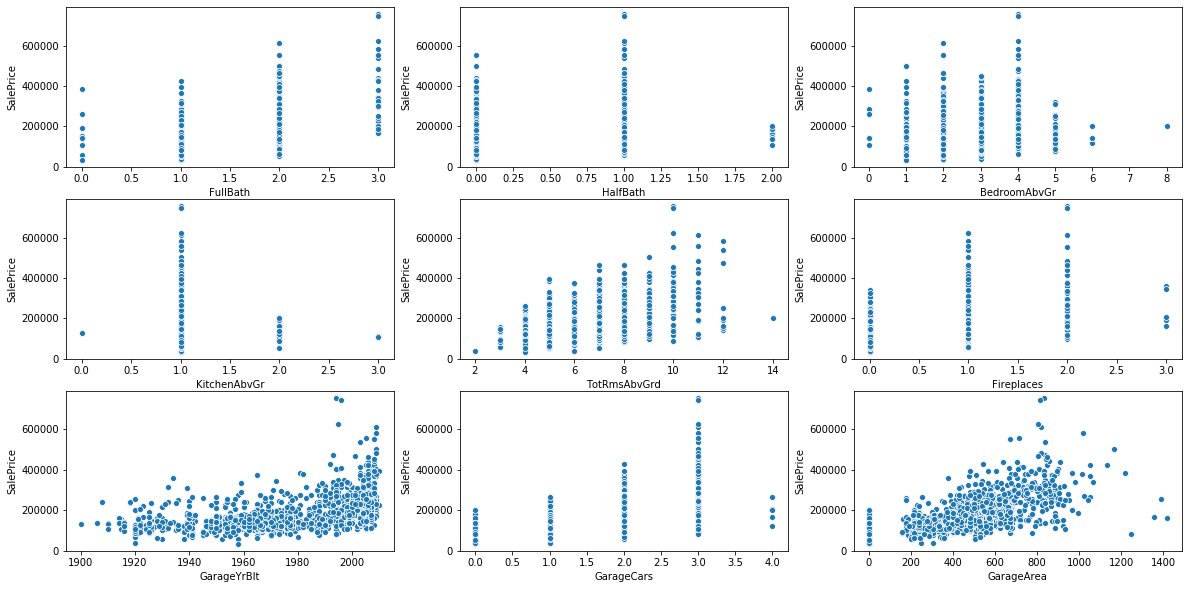

In [16]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.scatterplot(x=df1[col1[18]],y=df1.SalePrice,ax=ax[0][0])
sns.scatterplot(x=df1[col1[19]],y=df1.SalePrice,ax=ax[0][1])
sns.scatterplot(x=df1[col1[20]],y=df1.SalePrice,ax=ax[0][2])
sns.scatterplot(x=df1[col1[21]],y=df1.SalePrice,ax=ax[1][0])
sns.scatterplot(x=df1[col1[22]],y=df1.SalePrice,ax=ax[1][1])
sns.scatterplot(x=df1[col1[23]],y=df1.SalePrice,ax=ax[1][2])
sns.scatterplot(x=df1[col1[24]],y=df1.SalePrice,ax=ax[2][0])
sns.scatterplot(x=df1[col1[25]],y=df1.SalePrice,ax=ax[2][1])
sns.scatterplot(x=df1[col1[26]],y=df1.SalePrice,ax=ax[2][2])

1. Garages with the capacity of 3 cars or around 900 sq.feet are sold at higher prices.

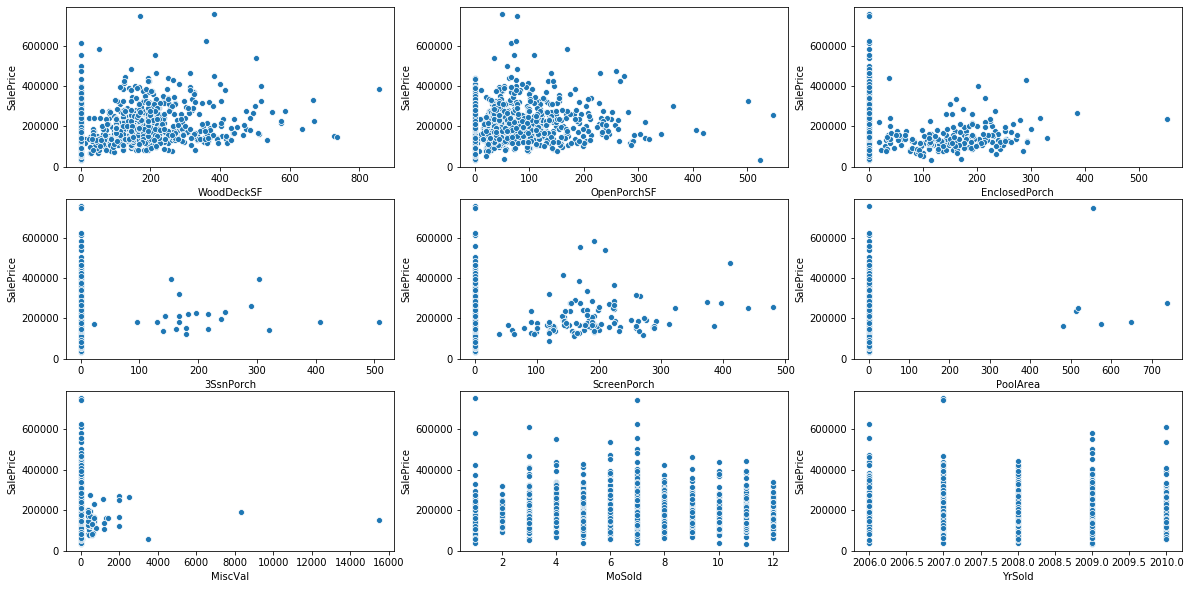

In [17]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.scatterplot(x=df1[col1[27]],y=df1.SalePrice,ax=ax[0][0])
sns.scatterplot(x=df1[col1[28]],y=df1.SalePrice,ax=ax[0][1])
sns.scatterplot(x=df1[col1[29]],y=df1.SalePrice,ax=ax[0][2])
sns.scatterplot(x=df1[col1[30]],y=df1.SalePrice,ax=ax[1][0])
sns.scatterplot(x=df1[col1[31]],y=df1.SalePrice,ax=ax[1][1])
sns.scatterplot(x=df1[col1[32]],y=df1.SalePrice,ax=ax[1][2])
sns.scatterplot(x=df1[col1[33]],y=df1.SalePrice,ax=ax[2][0])
sns.scatterplot(x=df1[col1[34]],y=df1.SalePrice,ax=ax[2][1])
sns.scatterplot(x=df1[col1[35]],y=df1.SalePrice,ax=ax[2][2])

1. OpenPorchSF 70-100 are sold at higher price 
2. Houses sold at the month of July are of higher price (many houses are sold above 75% of max sale price)

### HeatMap

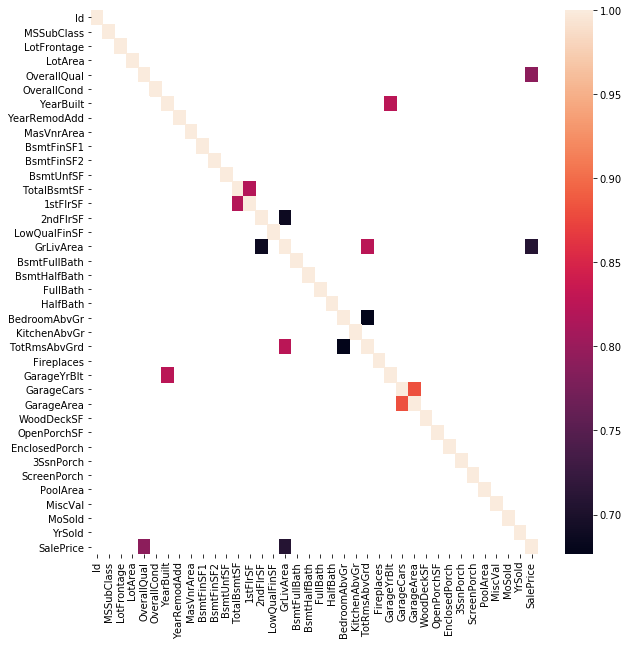

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr()[df1.corr()>0.65])

1. GarageArea and GarageCars are highly correlated. 
2. GarageYrBlt and YearBuilt are highly correlated. (one builds a garage along with the house) 
3. TotRmAbvGrd and GrLivArea are highly correlated.
4. 1stFlrSF and TotalBsmtSF are highly correlated. 
5. 2ndFlrSF and GrLivArea are highly correlated.
6. BedroomAbvGrd and TotRmsAbvGrd are highly correlated. (in a house most rooms are bedrooms)

In [19]:
df1.corr().SalePrice.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Dealing with categorical variables

In [20]:
col2=catcol.columns

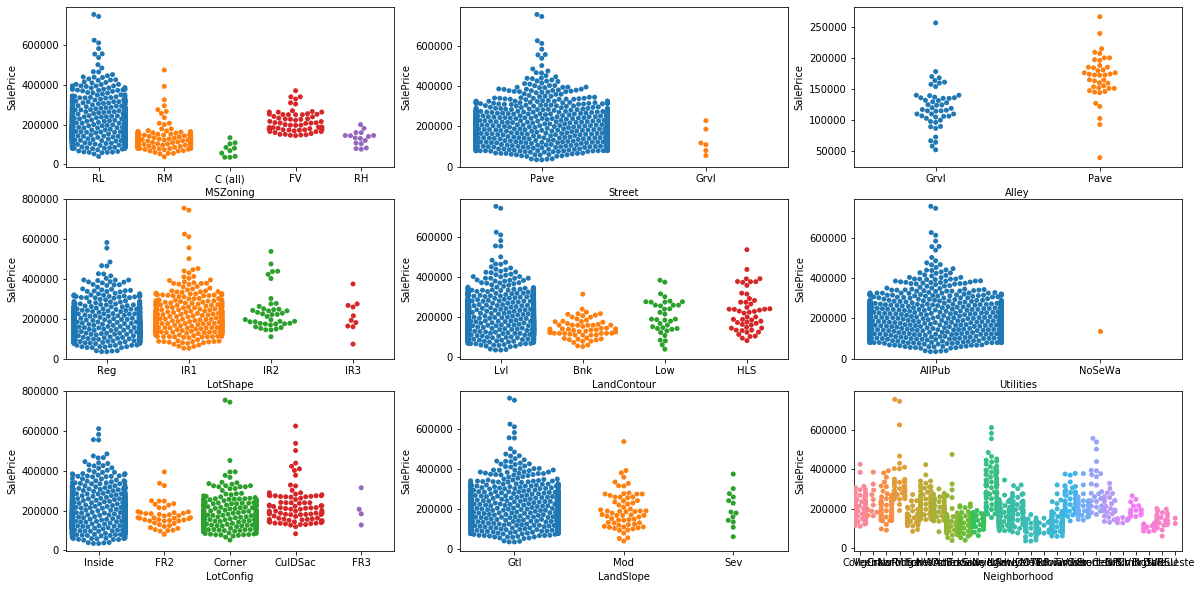

In [21]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.swarmplot(y=df1.SalePrice,x=df1[col2[0]],ax=ax[0][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[1]],ax=ax[0][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[2]],ax=ax[0][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[3]],ax=ax[1][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[4]],ax=ax[1][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[5]],ax=ax[1][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[6]],ax=ax[2][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[7]],ax=ax[2][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[8]],ax=ax[2][2])

1. Paved Alleys are paid more than the Graveled Alleys 

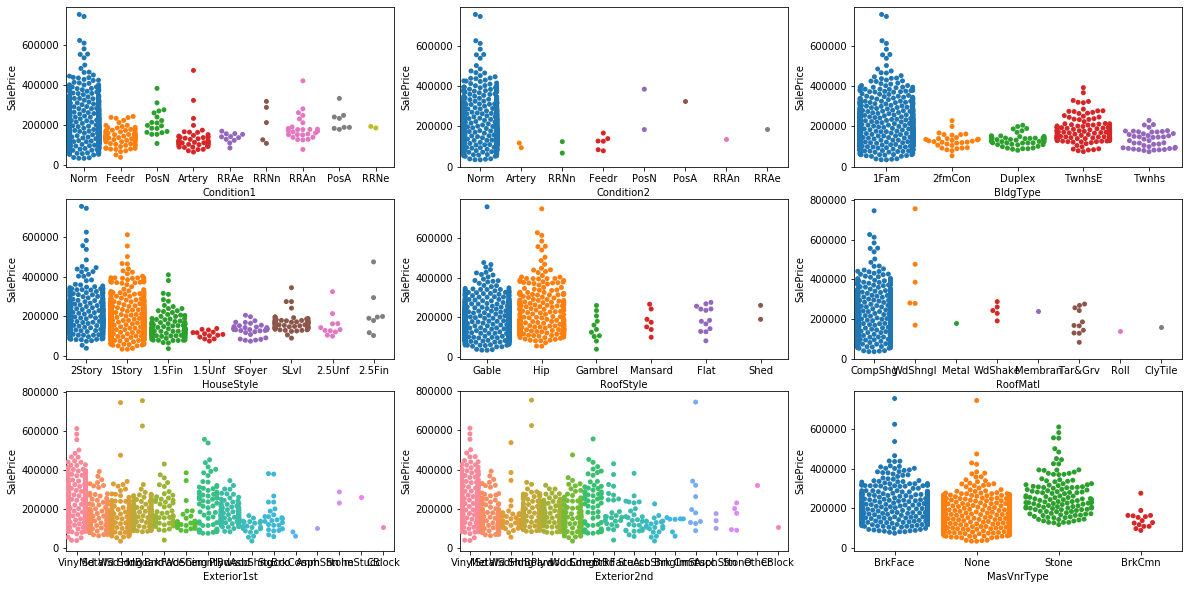

In [22]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.swarmplot(y=df1.SalePrice,x=df1[col2[9]],ax=ax[0][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[10]],ax=ax[0][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[11]],ax=ax[0][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[12]],ax=ax[1][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[13]],ax=ax[1][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[14]],ax=ax[1][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[15]],ax=ax[2][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[16]],ax=ax[2][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[17]],ax=ax[2][2])

1. Normal conditioned houses are sold at higher price.
2. Single Family detatched houses are costlier than otherz

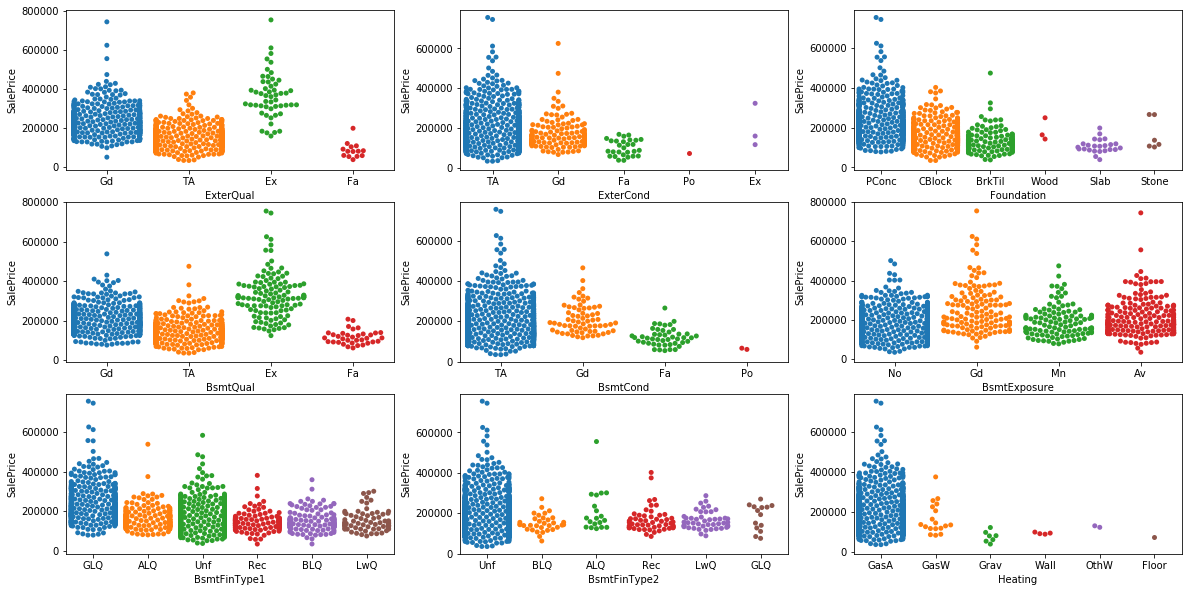

In [23]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.swarmplot(y=df1.SalePrice,x=df1[col2[18]],ax=ax[0][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[19]],ax=ax[0][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[20]],ax=ax[0][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[21]],ax=ax[1][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[22]],ax=ax[1][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[23]],ax=ax[1][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[24]],ax=ax[2][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[25]],ax=ax[2][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[26]],ax=ax[2][2])

1. Gas forced warm air furnace houses fetch higher prices ( also most houses have this feature )

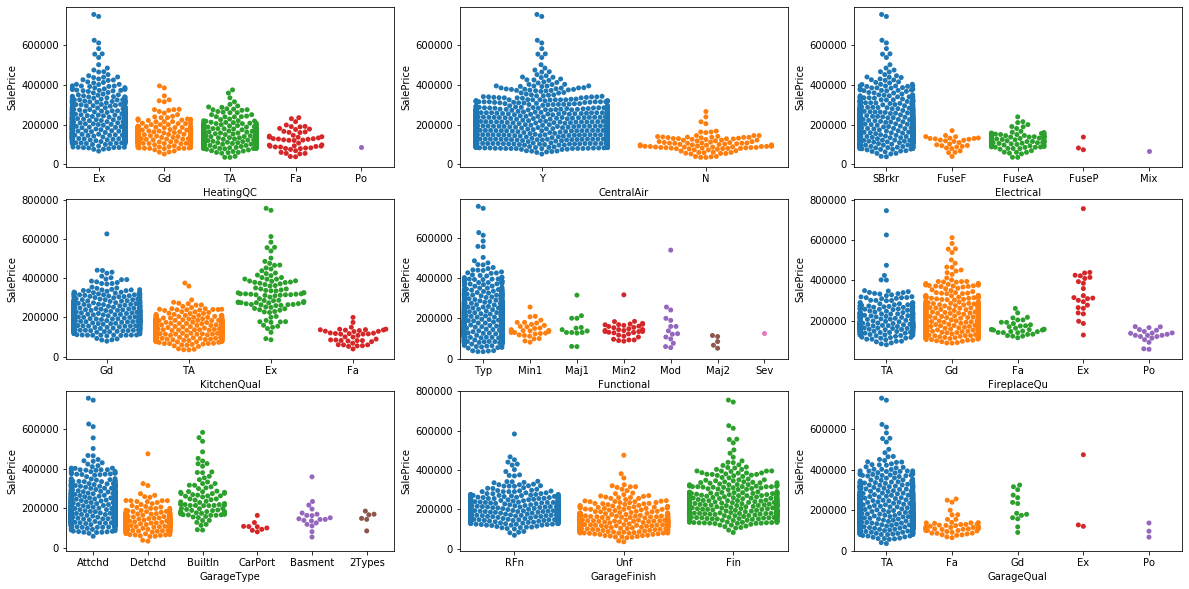

In [24]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.swarmplot(y=df1.SalePrice,x=df1[col2[27]],ax=ax[0][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[28]],ax=ax[0][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[29]],ax=ax[0][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[30]],ax=ax[1][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[31]],ax=ax[1][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[32]],ax=ax[1][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[33]],ax=ax[2][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[34]],ax=ax[2][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[35]],ax=ax[2][2])

1. Houses with Garage quality of typical/average is sold at higher price than houses with Excellent garages. ( Number of houses    with T/A houses are more ) 

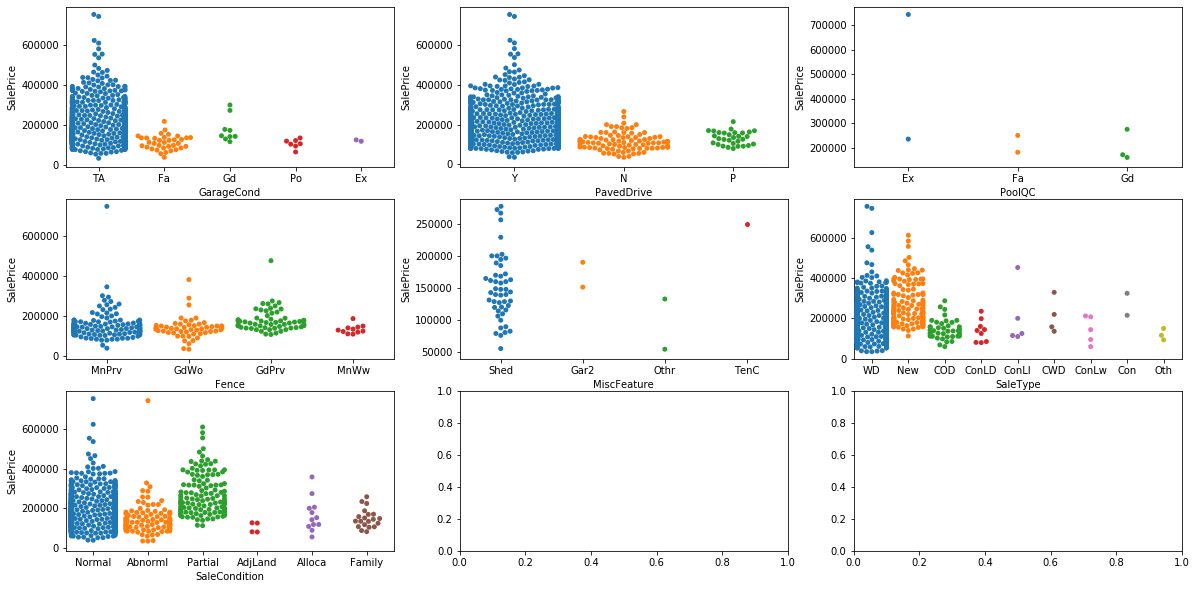

In [25]:
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
sns.swarmplot(y=df1.SalePrice,x=df1[col2[36]],ax=ax[0][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[37]],ax=ax[0][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[38]],ax=ax[0][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[39]],ax=ax[1][0])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[40]],ax=ax[1][1])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[41]],ax=ax[1][2])
sns.swarmplot(y=df1.SalePrice,x=df1[col2[42]],ax=ax[2][0])